In [1]:
# ignore this
%load_ext music21.ipython21

# User's Guide: Chapter 14: Time Signatures

Up until now almost all the music we've been working with has been in 4/4.  That's not because we love common time so much, but simply because as we noted in :ref:`Chapter 4 <usersGuide_04_stream1>` it's because 4/4 is the default time signature for `music21` :class:`~music21.stream.Stream` objects that don't have another time signature applied to them.

In general, :class:`~music21.meter.TimeSignature` objects are found within :class:`~music21.stream.Measure` objects (a Stream subclass). However, in some cases :class:`~music21.meter.TimeSignature` objects can exist directly on a Stream. 

TimeSignature objects, as a subclass of the :class:`~music21.base.Music21Object`, have an offset and can be positioned anywhere on a Stream. When placed in a Measure, TimeSignature objects are often placed at the start, or zero offset position. The Measure property :meth:`timeSignature <music21.stream.Measure.timeSignature>` can be used to set or get a TimeSignature at the zero offset position. If a Measure does not have a TimeSignature, the :meth:`timeSignature <music21.stream.Measure.timeSignature>` property returns None.

Everything that we need to use other time signatures is contained in the `meter` module, which is imported when you type `from music21 import *`.  There are lots of things in that module, but the one that we care about most is the :class:`~music21.meter.TimeSignature` object.  Let's create a couple of notes and a `TimeSignature` object.

In [2]:
from __future__ import print_function # DOCS_HIDE
from music21 import *

noteC = note.Note("C4", type="half")
noteD = note.Note("D4", type="quarter")
noteE = note.Note("E4", type="quarter")
noteF = note.Note("F4", type="half")

tsThreeFour = meter.TimeSignature('3/4')

print(tsThreeFour.numerator, '/',  tsThreeFour.denominator)

3 / 4


Now that we have our objects, let's create a :class:`~music21.stream.Stream` object that uses these notes and the TimeSignature object.  We'll append each object in order using a `for` loop:

In [3]:
stream1 = stream.Stream()

for thisThing in [tsThreeFour, noteC, noteD, noteE, noteF]:
    stream1.append(thisThing)

Let's look at `stream1` using `.show('text')`:

In [4]:
stream1.show('text')

{0.0} <music21.meter.TimeSignature 3/4>
{0.0} <music21.note.Note C>
{2.0} <music21.note.Note D>
{3.0} <music21.note.Note E>
{4.0} <music21.note.Note F>


Wondering why both the time signature and the first note begin at `offset` 0.0 in the Stream? That's because by default TimeSignature objects have no length:

In [5]:
tsThreeFour.duration.quarterLength

0.0

If we :meth:`~music21.base.Music21Object.show` the `Stream` without using `show('text')`, we see that there are two measures of 3/4:

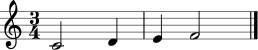

In [6]:
stream1.show()

The `TimeSignature` object helps the display module known how to divide the Stream into :class:`~music21.stream.Measure` objects.  We can see this process directly if we create a new `Stream` from `stream1` that has measures using the :meth:`~music21.stream.Stream.makeMeasures` command:

In [7]:
stream2 = stream1.makeMeasures()
stream2.show('text')

{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.clef.TrebleClef>
    {0.0} <music21.meter.TimeSignature 3/4>
    {0.0} <music21.note.Note C>
    {2.0} <music21.note.Note D>
{3.0} <music21.stream.Measure 2 offset=3.0>
    {0.0} <music21.note.Note E>
    {1.0} <music21.note.Note F>
    {3.0} <music21.bar.Barline style=final>


The makeMeasures command, by the way, also put a TrebleClef into the `Stream` and set the last barline to "final", which makes its output a little prettier in Lilypond (which is what the documentation uses; you are probably using MusicXML if you're following along, which gets it right...)

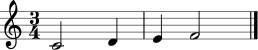

In [8]:
stream2.show()

## Working with Beats in TimeSignatures

Beyond just getting nicely formed measures, TimeSignature objects let us figure out information about what beat each :class:`~music21.note.Note` (or :class:`~music21.note.Rest` or :class:`~music21.chord.Chord`, etc.) is on.  Let's return to our Stream without measures and look at each note's beat:

In [9]:
stream1.notes[0]

<music21.note.Note C>

In [10]:
stream1.notes[0].beat

1.0

Okay, so the first note is on beat 1 (represented as 1.0 here).  That's different from its :meth:`offset <music21.base.Music21Object.offset>` which is 0.0.  Remember that the offset is the number of quarter notes from the beginning of the containing `Stream`.  The :meth:`beat <music21.base.Music21Object.beat>` on the other hand uses notation that is more familiar to musicians.  Let's look at the beat of all the notes in the Stream:

In [11]:
for n in stream1.notes:
    print(n, n.beat)

<music21.note.Note C> 1.0
<music21.note.Note D> 3.0
<music21.note.Note E> 1.0
<music21.note.Note F> 2.0


If we only wanted to find notes that were on the downbeat we could filter on beats like so:

In [12]:
for n in stream1.notes:
    if n.beat == 1.0:
        print(n)

<music21.note.Note C>
<music21.note.Note E>


What would happen if the time signature were different?  We can find out by changing the TimeSignature object already in the Stream:

In [13]:
tsThreeFour.ratioString

'3/4'

In [14]:
tsThreeFour.ratioString = '2/4'

Now the variable name of the TimeSignature object makes little sense, but we do find that the first, second, and fourth notes are on the downbeat.

In [15]:
for n in stream1.notes:
    print(n, n.beat)

<music21.note.Note C> 1.0
<music21.note.Note D> 1.0
<music21.note.Note E> 2.0
<music21.note.Note F> 1.0


If we change the TimeSignature again to 6/8 then the same notes will be on the downbeat as in the original 3/4 Stream, but they will have different beat numbers.  This time we'll use the :meth:`numerator <music21.meter.TimeSignature.numerator>` and :meth:`denominator <music21.meter.TimeSignature.denominator>` to change the meter.  (Remember that all these different tricks are documented in full at :class:`music21.meter.TimeSignature`.

In [16]:
tsThreeFour.numerator = 6
tsThreeFour.denominator = 8
tsThreeFour

<music21.meter.TimeSignature 6/8>

In [17]:
for n in stream1.notes:
    print(n, n.beat)

<music21.note.Note C> 1.0
<music21.note.Note D> 7/3
<music21.note.Note E> 1.0
<music21.note.Note F> 5/3


Notice that by default 6/8 is assumed to be a "fast" 6/8, that is, having two beats and not six per measure.  That's because there's no easy way to specify the former.  We can see how many beats there are per measure by requesting the :meth:`beatCount <music21.meter.TimeSignature.beatCount>` of a `TimeSignature`:

In [18]:
tsThreeFour.beatCount

2

And we can change that and see how it affects the results:

In [19]:
tsThreeFour.beatCount = 6

for n in stream1.notes:
    print(n, n.beat)

<music21.note.Note C> 1.0
<music21.note.Note D> 5.0
<music21.note.Note E> 1.0
<music21.note.Note F> 3.0


Using the terminology most musicians use, you can create TimeSignatures of 6/8 with either beat count directly:

In [20]:
tsFast68 = meter.TimeSignature('fast 6/8')
tsSlow68 = meter.TimeSignature('slow 6/8')

tsFast68.beatCount, tsSlow68.beatCount

(2, 6)

## Working with TimeSignatures in scores

We have been dealing with TimeSignature objects that are in a single Stream.  However, in general, :class:`~music21.meter.TimeSignature` objects are found within :class:`~music21.stream.Measure` objects inside a :class:`~music21.stream.Part` object.  Both :class:`~music21.stream.Measure` and :class:`~music21.stream.Part` are subclasses of :class:`~music21.stream.Stream`.  Let's get a Bach chorale with some nice eighth-note runs from the :ref:`moduleCorpus` module's :func:`~music21.corpus.parse` function.  It returns a :class:`~music21.stream.Score`, which is also a `Stream` subclass.

In [21]:
myBach = corpus.parse('bach/bwv57.8')

print(myBach.__class__)

<class 'music21.stream.Score'>


We will get the Alto part using the `Score` object's :meth:`parts <music21.stream.Score.parts>` list:

In [22]:
alto = myBach.parts['Alto']

alto

<music21.stream.Part Alto>

When we call `.show()` on this Part (or on `myBach` itself), we can see that this is one of the few chorales that Bach wrote that is in 3/4:

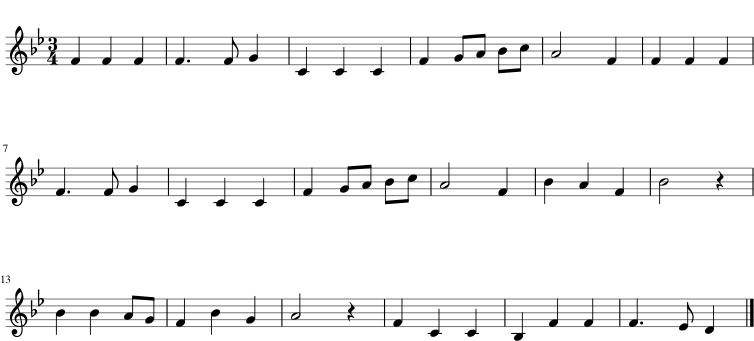

In [23]:
alto.show()

To examine the :class:`~music21.meter.TimeSignature` object active for this part, there are a few approaches. One method is to simply search for the class within all objects in the Part, or the flattened Part Stream representation. Remember that a Part is generally built of Measures, or Stream-embedded containers. To get all the elements in the Stream we can use the :meth:`flat <music21.stream.Stream.flat>` property, and then search for a class with the :meth:`~music21.stream.Stream.getElementsByClass` method. This returns a new Stream containing all found classes. The first element in this Stream is the TimeSignature.

In [24]:
alto.flat.getElementsByClass(meter.TimeSignature)[0]

<music21.meter.TimeSignature 3/4>

In [25]:
len(alto.flat.getElementsByClass(meter.TimeSignature))

1

We see that there is exactly one TimeSignatures in the `Part`.

Alternatively, we can look at the first Measure in the Stream, and examine the timeSignature property.

In [26]:
alto.measure(1).timeSignature

<music21.meter.TimeSignature 3/4>

Other measures don't have TimeSignature objects:

In [27]:
alto.measure(7).timeSignature is None

True

Let's change that!

In [28]:
alto.measure(7).timeSignature = meter.TimeSignature('6/8')

Now we'll rebeam according to the new TimeSignatures:

In [29]:
alto.makeBeams(inPlace=True)

We'll clear all the stem directions so that we don't get really screwy beams, and then show the new score.

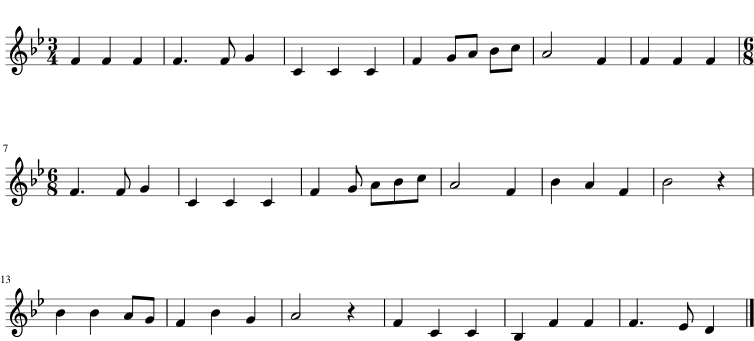

In [30]:
for n in alto.flat.notes:
    n.stemDirection = None

alto.show()

We've sort of cheated by changing the TimeSignature to something that kept all the measure lengths the same.  Let's rebar everything.  First we'll flatten the alto part and then get everything that is NOT a TimeSignature.  We will use :meth:`~music21.stream.Stream.getElementsNotOfClass` and can either pass it the string "TimeSignature" as we did with "getElementsByClass" above, or for either method we can pass in a class object, which we'll do here:

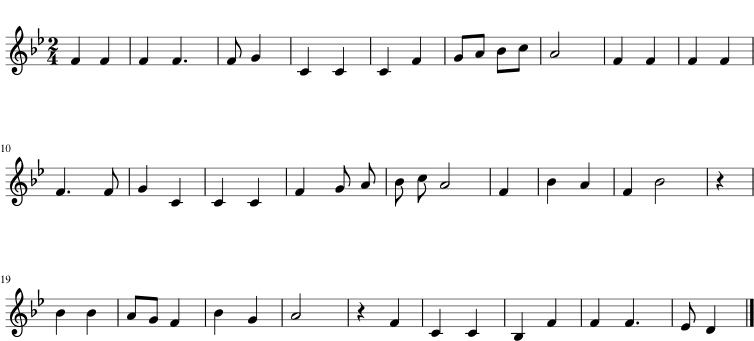

In [31]:
newAlto = alto.flat.getElementsNotOfClass(meter.TimeSignature)
newAlto.insert(0, meter.TimeSignature('2/4'))
newAlto.show()

Whoops! Some of those measures, such as mm 2-3, are screwy.  Let's run the powerful command :meth:`~music21.stream.Stream.makeNotation` first before showing:

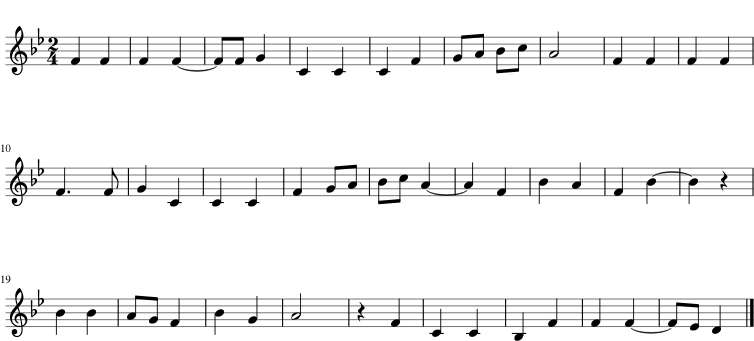

In [32]:
newAltoFixed = newAlto.makeNotation()
newAltoFixed.show()

We can continue to add multiple TimeSignature objects to this Stream of Notes. First, we will replace the 2/4 bar previously added with a new TimeSignature, using the Stream :meth:`~music21.stream.Stream.replace` method. Then, we will insert a number of additional TimeSignature objects at offsets further into the Stream. Again, as this Stream has no Measures, temporary Measures are automatically created when calling the `show()`method.

In [33]:
ts = newAlto.getTimeSignatures()[0]
ts

<music21.meter.TimeSignature 2/4>

In [34]:
newAlto.replace(ts, meter.TimeSignature('5/8'))
newAlto.getTimeSignatures()[0]

<music21.meter.TimeSignature 5/8>

In [35]:
newAlto.insert(10.0, meter.TimeSignature('7/8'))
newAlto.insert(17.0, meter.TimeSignature('9/8'))
newAlto.insert(26.0, meter.TimeSignature('3/8'))

Now we can `makeNotation()` again and show this wacky interpretation of Bach:

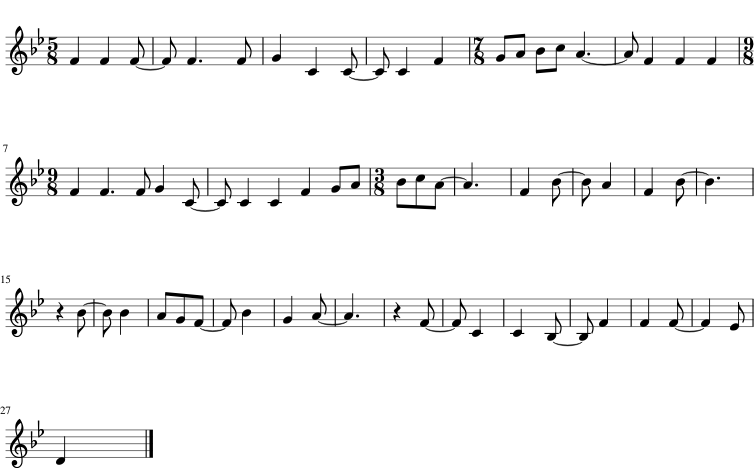

In [36]:
newAlto.makeNotation().show()

A quick note: If you only want to gather Notes, Rests, or other subclasses of GeneralNote, but don't mind losing other information as such the :class:`~music21.key.KeySignature` and :class:`~music21.instrument.Instrument` objects, then you achieve the same change in time signature using the notesAndRests property. (Otherwise, it's best to stick with the :meth:`~music21.stream.Stream.getElementsNotOfClass` method.

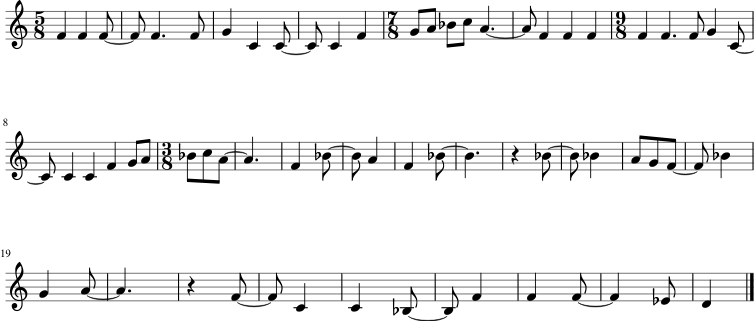

In [37]:
newAlto = alto.flat.notesAndRests
newAlto.insert(0.0, meter.TimeSignature('5/8'))
newAlto.insert(10.0, meter.TimeSignature('7/8'))
newAlto.insert(17.0, meter.TimeSignature('9/8'))
newAlto.insert(26.0, meter.TimeSignature('3/8'))
newAlto.makeNotation().show()   

Let's see how that looks in all the parts by putting the time signatures in their "proper" place in every Part.  First, lets get all the TimeSignature objects in the score with ``.getElementsByClass('TimeSignature')`` or, even better, the shortcut, :meth:`~music21.stream.Stream.getTimeSignatures`.  This only works because we already flattened `Alto` to make `newAlto`

In [38]:
tsList = newAlto.getTimeSignatures()

tsList is a `Part` object so we can show it:

In [39]:
print(tsList.__class__)
tsList.show('text')

<class 'music21.stream.Part'>
{0.0} <music21.meter.TimeSignature 5/8>
{10.0} <music21.meter.TimeSignature 7/8>
{17.0} <music21.meter.TimeSignature 9/8>
{26.0} <music21.meter.TimeSignature 3/8>


Now we'll create a new `Score` object and flatten all the parts from the original `myBach` and get everything but the `TimeSignature` objects, run `.makeNotation()` and put it in the new score:

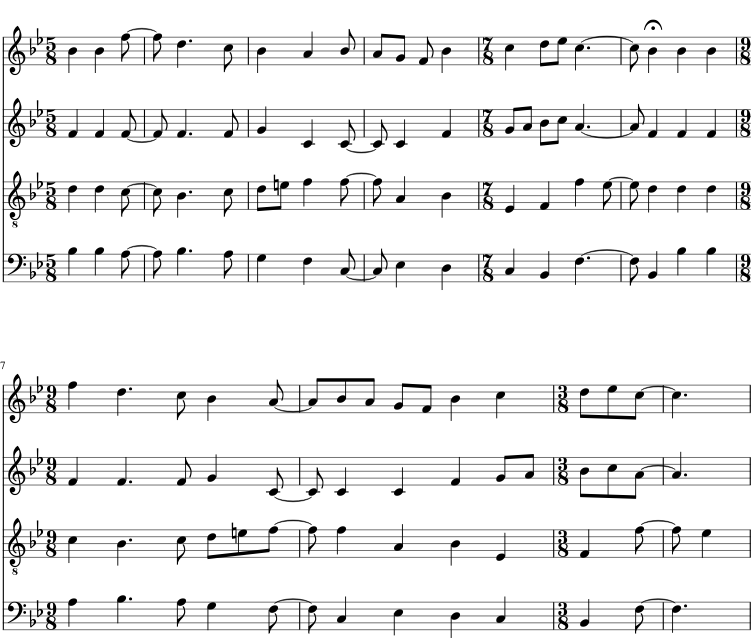

In [40]:
newScore = stream.Score()

for part in myBach.parts:
    flatPart = part.flat
    noTSPart = flatPart.getElementsNotOfClass('TimeSignature')
    for ts in tsList:
        noTSPart.insert(ts.offset, ts)
    noTSPart.makeNotation(inPlace=True)
    newScore.insert(0, noTSPart)

newScore.measures(1, 10).show()

## Working with Beats in a score

If a Note is in a Measure, and that Measure or a preceding Measure has a TimeSignature, it is possible to find the beat, or the position of the Note in terms of the count of whole or fractional subdivisions of top-level beat partitions.

The Note :meth:`beat <music21.base.Music21Object.beat>` property will return, if available, a numerical representation of the beat, with a floating point value corresponding to the proportional position through the beat. The Note :meth:`beatStr <music21.base.Music21Object.beatStr>` property returns a string representation, replacing floating point values with fractions when available.

Let's see what we can do with beats in our same Bach score.  Let's use the :meth:`beatStr <music21.base.Music21Object.beatStr>` for "beat string" tag to get a nicely formatted measure of the beat for each note in the Soprano part:

In [41]:
sopr = myBach.parts['Soprano'].measures(1,2)

for n in sopr.flat.notes:
    print(n, n.beatStr)

<music21.note.Note B-> 1
<music21.note.Note B-> 2
<music21.note.Note F> 3
<music21.note.Note D> 1
<music21.note.Note C> 2 1/2
<music21.note.Note B-> 3


Instead of just printing that though, let's put the beatStr as a lyric on each note:

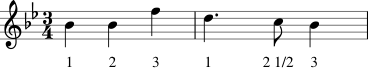

In [42]:
for n in sopr.flat.notes:
    n.addLyric(n.beatStr)

sopr.show()

If we change the TimeSignature in a Part, the beat counts will reflect this change. For example, if the Bass part of the same chorale is re-barred in 6/8, new, syncopated beat counts will be given.

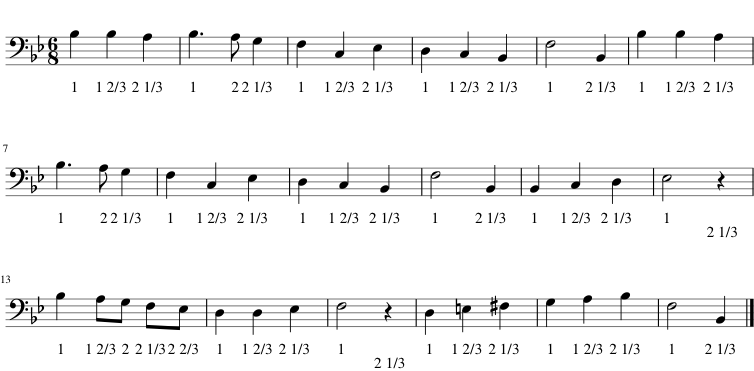

In [43]:
bass = myBach.getElementById('Bass')
newBass = bass.flat.getElementsNotOfClass(meter.TimeSignature)
newMeasures = newBass.makeMeasures(meter.TimeSignature('6/8'))
newMeasures.makeTies(inPlace=True)
for n in newMeasures.flat.notesAndRests:
    n.addLyric(n.beatStr)
newMeasures.show()   

Each note also has a particular :meth:`beatStrength <music21.base.Music21Object.beatStrength>` that shows how metrically accented `music21` thinks it is, with 1.0 being most accented and 0 being least.

In [44]:
for n in sopr.flat.notes:
    print(n, n.beatStrength)

<music21.note.Note B-> 1.0
<music21.note.Note B-> 0.5
<music21.note.Note F> 0.5
<music21.note.Note D> 1.0
<music21.note.Note C> 0.25
<music21.note.Note B-> 0.5


This chapter gives a solid introduction to the types of things you can do with TimeSignatures and beats.  We will return again to this topic later in the User's Guide to show how beaming, accentuation, and other elements can be controlled through meter and `TimeSignature` objects.  But time is not the only thing to have a signature.  The next chapter will guide you through working with :class:`~music21.key.KeySignature` and :class:`~music21.key.Key` objects.